In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Imported all the important libraries

In [2]:
data = pd.read_csv("C:\\Users\\manis\\Downloads\\Programs\\train_details.csv")#read the data

C:\Users\manis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()#looking at the data

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop("Unnamed: 0",inplace=True,axis=1)#removed one coloumn found with name unnamed since it was of no use for us in preprocessing steps

In [5]:
data.columns#looking at the columns available in data after removing unnamed column

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

- Now we need to look for null values and then try removing them from our dataset.

In [6]:
data.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserVersion                                     0
device.browserSize                                        0
device.operatingSystem                                    0
device.operatingSystemVersion                             0
device.isMobile                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceModel                                  0
device.mobileInputSelector              

- As we can see from above checked details, there are so many null values in our train dataset. Also, we can see that these columns can be removed since these dont impact our target column which is transaction revenue.

In [7]:
#saving all the columns that needs to be dropped under a variable for future use
col_drop = ["trafficSource.campaignCode","trafficSource.adContent","trafficSource.adwordsClickInfo.isVideoAd","trafficSource.adwordsClickInfo.adNetworkType","trafficSource.adwordsClickInfo.gclId","trafficSource.adwordsClickInfo.slot","trafficSource.adwordsClickInfo.page","trafficSource.referralPath","trafficSource.isTrueDirect","trafficSource.keyword","totals.newVisits","totals.bounces"]

In [8]:
#dropping all the columns with high null values
data.drop(col_drop,inplace=True,axis=1)

In [9]:
#looking at the new dataset
data.shape

(903653, 43)

- Here we can see that in our original train dataset, we had a total of 54 columns while after dropping the columns with null values, our new dataset thus obtained only have 43 columns.

In [10]:
data.isnull().sum()#Re-Checking null values.
#this can be seen that our target variable has approximately 90% of null values which we need to imput in later stage for effective model and accuracy

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserVersion                                     0
device.browserSize                                        0
device.operatingSystem                                    0
device.operatingSystemVersion                             0
device.isMobile                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceModel                                  0
device.mobileInputSelector              

# As it can be clearly seen that, from a total of 903653 rows of our target variable, 892138 are null values. Hence we need to now just look at the data without null values.

In [11]:
revenue_generated = data.dropna(axis=0)#just considering those columns which do not have null values. 

In [12]:
revenue_generated#reading our new data without null values

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.adwordsClickInfo.criteriaParameters
752,Direct,20160902,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,11,11.0,37860000.0,(not set),(direct),(none),not available in demo dataset
753,Organic Search,20160902,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,11,10.0,306670000.0,(not set),google,organic,not available in demo dataset
799,Referral,20160902,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,13,11.0,68030000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
802,Referral,20160902,185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,13,12.0,26250000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
859,Referral,20160902,3244885836845029978,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,17,14.0,574150000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903302,Referral,20170104,6849604863010168468,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,61,48.0,335260000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
903305,Referral,20170104,211986650009953276,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,66,30.0,599950000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
903314,Referral,20170104,9981562221973608723,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,122,90.0,30750000.0,(not set),mall.googleplex.com,referral,not available in demo dataset
903315,Direct,20170104,963126344221316701,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,not available in demo dataset,not available in demo dataset,1,130,90.0,69390000.0,(not set),(direct),(none),not available in demo dataset


In [13]:
revenue_not_generated = data[data["totals.transactionRevenue"].isnull()]#just crosschecking whether and if our revenue_generated column has correct values.

In [14]:
revenue_not_generated.shape#cross checking successful

(892138, 43)

In [15]:
revenue_generated['totals.transactionRevenue'] = revenue_generated['totals.transactionRevenue'].astype(int)#converted into int datatype to all the values present in the target variable
revenue_generated['totals.transactionRevenue'] = np.log2(revenue_generated['totals.transactionRevenue'])#values are present in millions in target variable so considering to take log transform values for easier graph plots while displaying the column relations etc and two display more accurate results
#to reduce the variance and make the data easy for plotting log of revenue is taken

<ipython-input-15-9ed4929634aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated['totals.transactionRevenue'] = revenue_generated['totals.transactionRevenue'].astype(int)
C:\Users\manis\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-15-9ed4929634aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated['totals.transactionRevenue'] = np.log2(revenue_gene

# Univariate Analysis

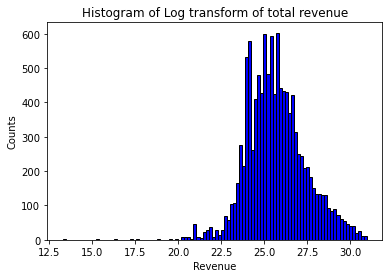

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(revenue_generated['totals.transactionRevenue'], color = 'blue', edgecolor = 'black',
         bins = int(100))


plt.title('Histogram of Log transform of total revenue')
plt.ylabel('Counts')
plt.xlabel('Revenue')
plt.show()

- A bar graph showing records with respect to device category like how many counts is coming from desktop,mobile or tablet etc

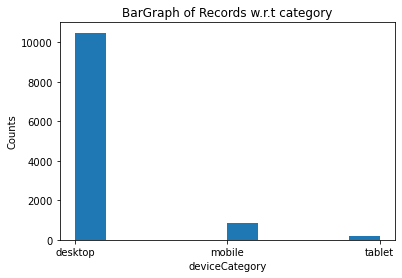

In [43]:
# matplotlib bargraph
plt.hist(revenue_generated["device.deviceCategory"])


plt.title('BarGraph of Records w.r.t category')
plt.ylabel('Counts')
plt.xlabel('deviceCategory')
plt.show()

- Another bar graph showing transactions generated with respect to different device category.
- Here this can be seen that as the total counts is higher with respect to category from the upper figure, the maximum transaction is also generated from same channels in the same order as can be clearly seen in the below figure.

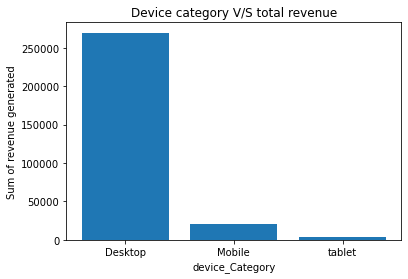

In [44]:
# matplotlib bargraph
category = ["Desktop","Mobile","tablet"]
plt.bar(category,revenue_generated.groupby(["device.deviceCategory"]).sum()["totals.transactionRevenue"].values)


plt.title('Device category V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('device_Category')
plt.show()

- Here now we are trying to get relation in between different browsers that a customer is using for making an purchase, thereby generating transaction revenue.

- Firstly, we need to figure out the browsers that are found and then trying to plot it with respect to transaction revenue generated by each device browser.

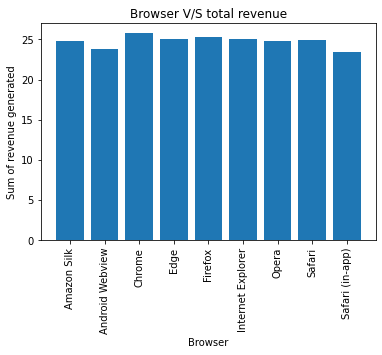

In [45]:
# print(revenue_generated["device.browser"].unique())
browser = ['Amazon Silk','Android Webview','Chrome',"Edge","Firefox","Internet Explorer","Opera","Safari","Safari (in-app)"]
values = revenue_generated.groupby(["device.browser"]).mean()["totals.transactionRevenue"].values

# matplotlib bargraph

plt.bar(browser,values)


plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('Browser')
plt.xticks(rotation=90)
plt.show()

- From the above figure, it is clearly visible that most of the revenue generated is coming from Chrome Browser and then from firefox,amazon silk, safari etc., browsers.

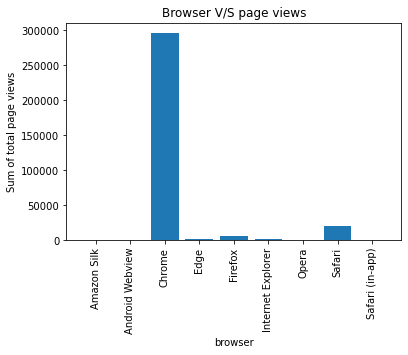

In [46]:
browser = dict(revenue_generated.groupby(["device.browser"]).sum()["totals.pageviews"])
browser.keys(),browser.values()
plt.bar(browser.keys(),browser.values())
plt.title('Browser V/S page views')
plt.ylabel('Sum of total page views')
plt.xlabel('browser')
plt.xticks(rotation=90)
plt.show()

- Here, we are trying to look at the data and found that the total page views for the google merchandise store is highest from the same browser as browser which was generating highest revenue i.e., chrome browser.

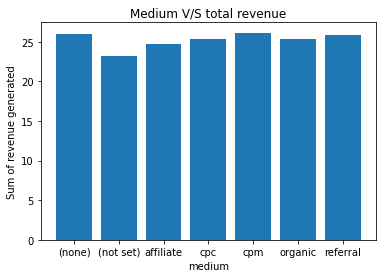

In [47]:
medium = dict(revenue_generated.groupby(["trafficSource.medium"]).mean()["totals.transactionRevenue"])
medium.keys(),medium.values()
plt.bar(medium.keys(),medium.values())
plt.title('Medium V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('medium')
plt.show()
# medium

# The Revenue generated from referral as a traffic source medium is quite high and also the page views from referral is the highest among other mediums.

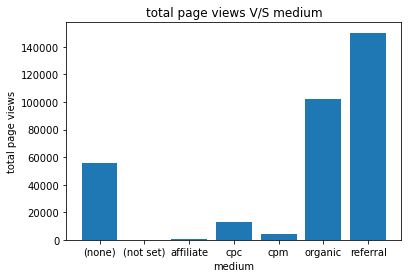

In [48]:
pviews = dict(revenue_generated.groupby(["trafficSource.medium"]).sum()["totals.pageviews"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total page views V/S medium')
plt.ylabel('total page views')
plt.xlabel('medium')
plt.show()

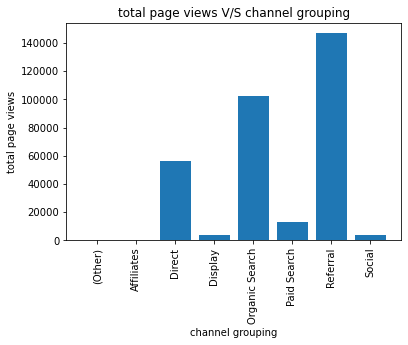

In [49]:

channelGrouping = dict(revenue_generated.groupby(["channelGrouping"]).sum()["totals.pageviews"])

channelGrouping.keys(),channelGrouping.values()
plt.bar(channelGrouping.keys(),channelGrouping.values())
plt.title('total page views V/S channel grouping')
plt.ylabel('total page views')
plt.xlabel('channel grouping')
channelGrouping
plt.xticks(rotation=90)
plt.show()

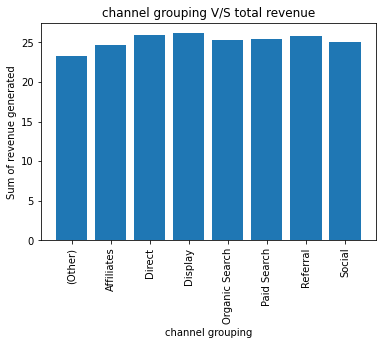

In [50]:
channelGrouping = dict(revenue_generated.groupby(["channelGrouping"]).mean()["totals.transactionRevenue"])

channelGrouping.keys(),channelGrouping.values()
plt.bar(channelGrouping.keys(),channelGrouping.values())
plt.title('channel grouping V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('channel grouping')
channelGrouping
plt.xticks(rotation=90)
plt.show()

# Few important insights from above two graphs
- The highest revenue is generated from the display channel while the total page views from display grouping channel is very less alongwith social channel.
# This can be said that display channel from the channel grouping is the highest revenue generator since overall views are less, so it can be said that even if the page views are less but the amount of people who were in the page views section, they have bought something in high quanitity thereby helping in becoming largest revenue generator.

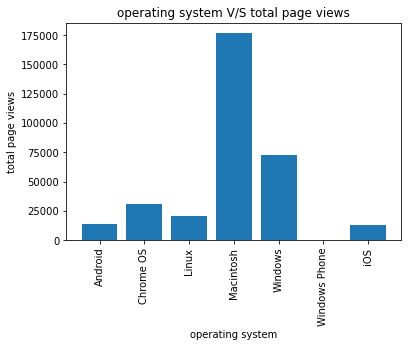

In [51]:
operatingsystem = dict(revenue_generated.groupby(["device.operatingSystem"]).sum()["totals.pageviews"])
operatingsystem.keys(),operatingsystem.values()
plt.bar(operatingsystem.keys(),operatingsystem.values())
plt.title('operating system V/S total page views')
plt.ylabel('total page views')
plt.xlabel('operating system')
plt.xticks(rotation=90)
plt.show()

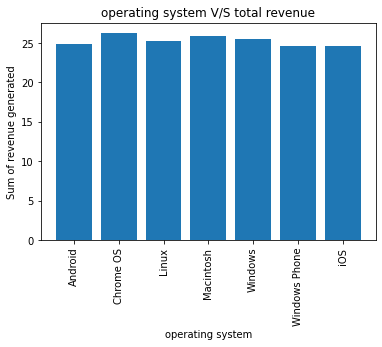

In [52]:
operatingsystem = dict(revenue_generated.groupby(["device.operatingSystem"]).mean()["totals.transactionRevenue"])
operatingsystem.keys(),operatingsystem.values()
plt.bar(operatingsystem.keys(),operatingsystem.values())
plt.title('operating system V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('operating system')
plt.xticks(rotation=90)
plt.show()

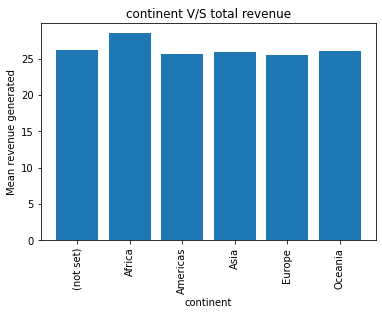

In [27]:
geonetwork = dict(revenue_generated.groupby(["geoNetwork.continent"]).mean()["totals.transactionRevenue"])
plt.bar(geonetwork.keys(),geonetwork.values())
plt.title('continent V/S total revenue')
plt.ylabel('Mean revenue generated')
plt.xlabel('continent')
plt.xticks(rotation=90)
plt.show()

In [28]:
revenue_generated[revenue_generated["geoNetwork.continent"] == "(not set)"]["totals.transactionRevenue"].mean()
#africa,americas,asia

26.2696264905202

# Correlation Between Two Numerical Variables

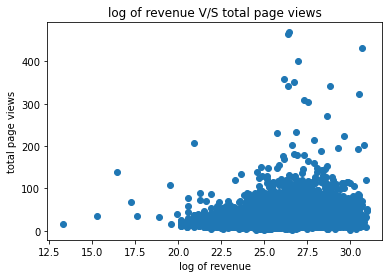

In [29]:
plt.scatter(revenue_generated["totals.transactionRevenue"],revenue_generated["totals.pageviews"])
plt.title('log of revenue V/S total page views')
plt.ylabel('total page views')
plt.xlabel('log of revenue')
plt.show()

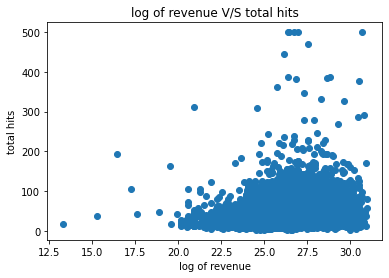

In [30]:
plt.scatter(revenue_generated["totals.transactionRevenue"],revenue_generated["totals.hits"])
plt.title('log of revenue V/S total hits')
plt.ylabel('total hits')
plt.xlabel('log of revenue')
plt.show()

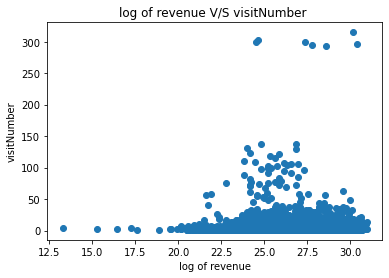

In [31]:
plt.scatter(revenue_generated["totals.transactionRevenue"],revenue_generated["visitNumber"])
plt.title('log of revenue V/S visitNumber ')
plt.ylabel('visitNumber')
plt.xlabel('log of revenue')
plt.show()

In [32]:
ismob_false = revenue_generated[revenue_generated["device.isMobile"]==False]["totals.transactionRevenue"]
ismob_true = revenue_generated[revenue_generated["device.isMobile"]==True]["totals.transactionRevenue"]

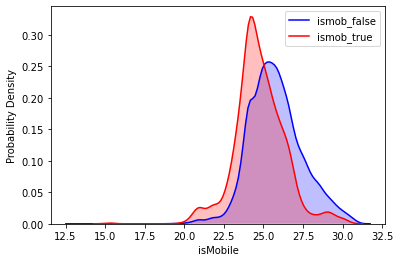

In [33]:
import seaborn as sns
sns.kdeplot(ismob_false, color='b', shade=True, Label='ismob_false')
sns.kdeplot(ismob_true, color='r', shade=True, Label='ismob_true') 
  
# Setting the X and Y Label 
plt.xlabel('isMobile') 
plt.ylabel('Probability Density') 
plt.legend()
plt.show()

# An probability density chart is made on the is_mobile column which are having boolean values(True/False)

- Now two graphs are made on the basis of yearly revenue generated and yearly number of visits
- This will help in predicting like exactly in which all months of the year we are seeing high visits or total transaction revenue generated is high for what all seasons or months.

<ipython-input-34-b5c40533ec3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated["date"] = revenue_generated["date"].astype(str)
<ipython-input-34-b5c40533ec3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated['date_year'] =  revenue_generated['date'].apply(lambda x:str(x[:4])+"/"+str(x[4:6])+"/"+str(x[6:]))
<ipython-input-34-b5c40533ec3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

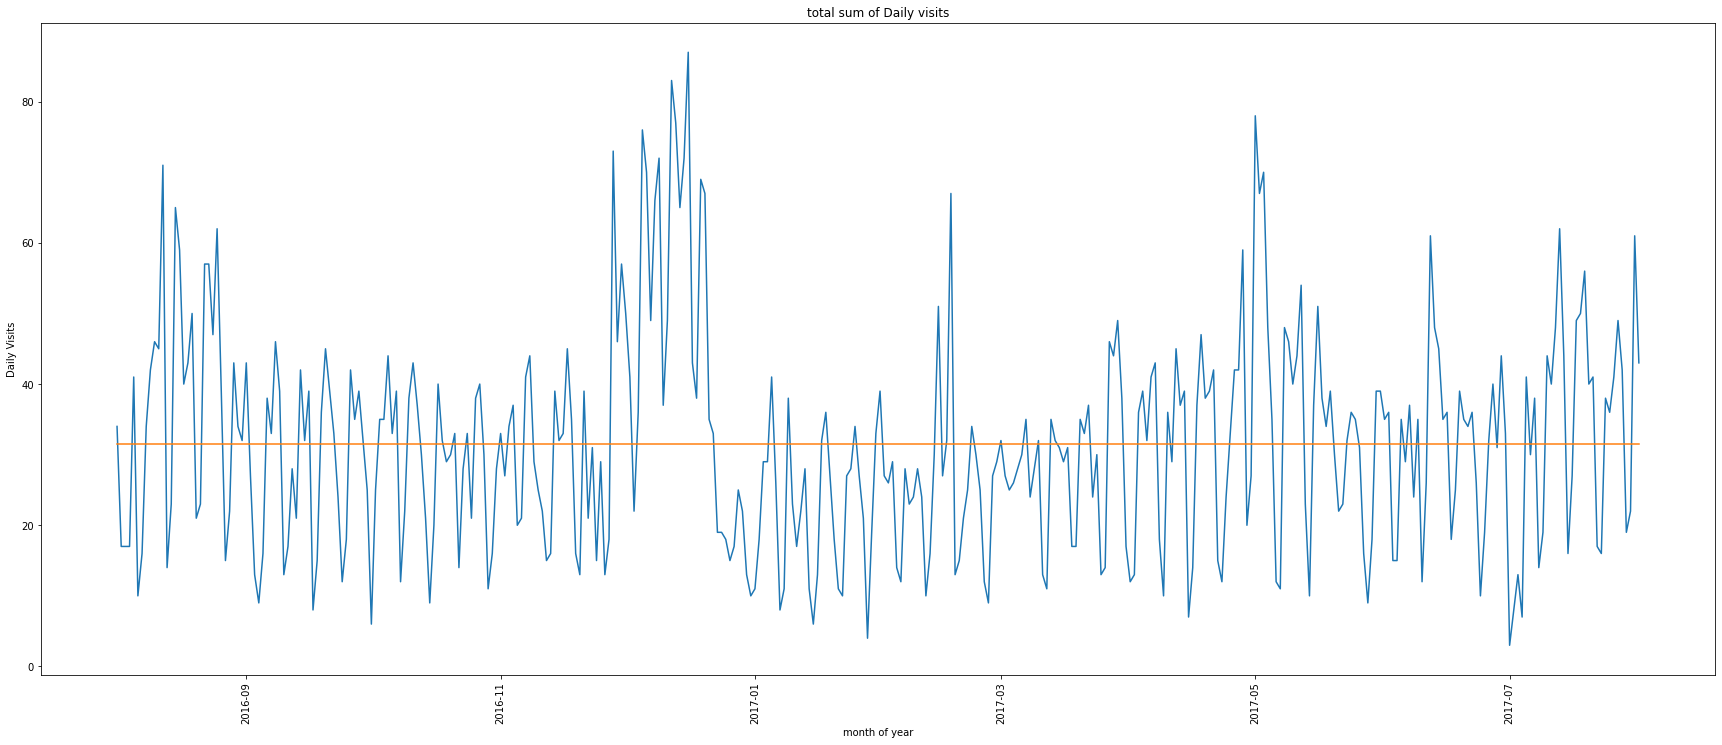

In [34]:
revenue_generated["date"] = revenue_generated["date"].astype(str)
revenue_generated['date_year'] =  revenue_generated['date'].apply(lambda x:str(x[:4])+"/"+str(x[4:6])+"/"+str(x[6:]))
revenue_generated['date_year'] = revenue_generated['date_year'].astype('datetime64[ns]')
date_dict=dict(revenue_generated.groupby(['date_year']).count()["visitNumber"])
plt.plot(list(date_dict.keys()),list(date_dict.values()))
plt.plot(list(date_dict.keys()),[np.mean(list(date_dict.values()))]*len(list(date_dict.keys())))
plt.title('total sum of Daily visits')
plt.ylabel('Daily Visits')
plt.xlabel('month of year')
fig = plt.gcf()
fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

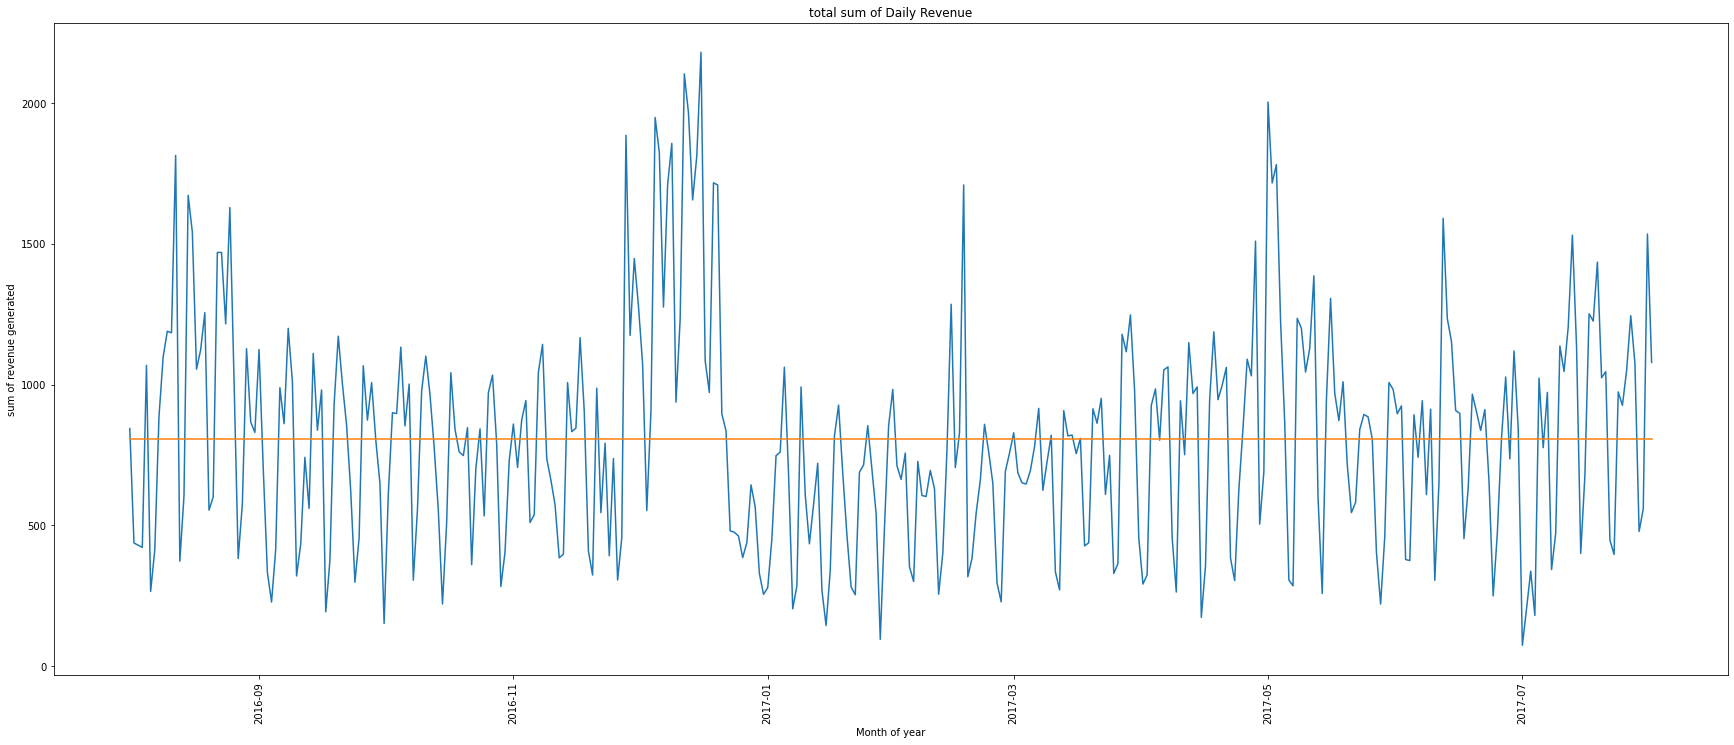

In [35]:
date_dict=dict(revenue_generated.groupby(['date_year']).sum()["totals.transactionRevenue"])
plt.plot(list(date_dict.keys()),list(date_dict.values()))
plt.plot(list(date_dict.keys()),[np.mean(list(date_dict.values()))]*len(list(date_dict.keys())))
plt.title('total sum of Daily Revenue')
plt.ylabel('sum of revenue generated')
plt.xlabel('Month of year')
fig = plt.gcf()
fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

# For easier analysis and to get an insight about the exact hour time in a day when the transaction happened, we need to convert the epoch timestamp to normal time stamp as shown below:

In [36]:
revenue_generated['actual_visit_start_time'] = pd.to_datetime(revenue_generated['visitStartTime'],unit='s')
revenue_generated["Hour"] = revenue_generated['actual_visit_start_time'].apply(lambda x:x.hour)

<ipython-input-36-492749601061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated['actual_visit_start_time'] = pd.to_datetime(revenue_generated['visitStartTime'],unit='s')
<ipython-input-36-492749601061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_generated["Hour"] = revenue_generated['actual_visit_start_time'].apply(lambda x:x.hour)


In [ ]:
# Hour V/S Total Revenue
- This here show the total revenue generated on hourly basis.
- 1) One important observation that can be seeb from the graph is that, i between 16:00 hrs and 18:00 hrs, we can see the maximum revenue generated.
- 2) Another thing that can be seen is that during morning and afternoon timings, in between 10:00AM and 13:00 hrs, the revenue generated is least.        

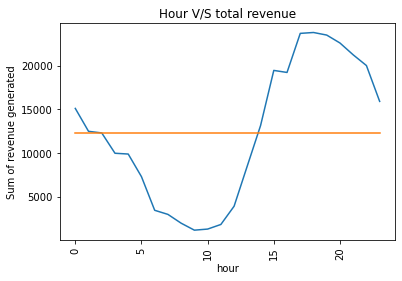

In [37]:
day_dict=dict(revenue_generated.groupby(['Hour']).sum()["totals.transactionRevenue"])
plt.plot(list(day_dict.keys()),list(day_dict.values()))
plt.plot(list(day_dict.keys()),[np.mean(list(day_dict.values()))]*len(list(day_dict.keys())))
plt.title('Hour V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('hour')
# fig = plt.gcf()
# fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

# Total Visits V/S Hours
- 1) Here, it can be clearly seen that the total no of visits in the store is also similarly high at the same time(between 16:00 hrs and 18:00 hrs) as that of revenue generated timestamp.
- 2) Another thing that can be seen is that during morning and afternoon timings, in between 10:00AM and 13:00 hrs, the revenue generated is least as well as the total visits are also minimum during same time frame.

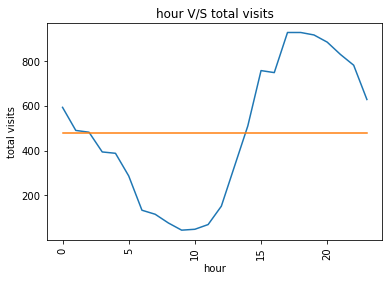

In [38]:
day_dict=dict(revenue_generated.groupby(['Hour']).sum()["totals.visits"])
plt.plot(list(day_dict.keys()),list(day_dict.values()))
plt.plot(list(day_dict.keys()),[np.mean(list(day_dict.values()))]*len(list(day_dict.keys())))
plt.title('hour V/S total visits')
plt.ylabel('total visits')
plt.xlabel('hour')
# fig = plt.gcf()
# fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

# Total revenue V/S total hits and V/S Total Page views
- 1) Here, it can be clearly seen that the total no of hits in the store and total page views is also similarly high at the same time(between 16:00 hrs and 18:00 hrs) as that of revenue generated timestamp.
- 2) Another thing that can be seen is that during morning and afternoon timings, in between 10:00AM and 13:00 hrs, the revenue generated is least as well as the total hits and total page views are also minimum during same time frame.

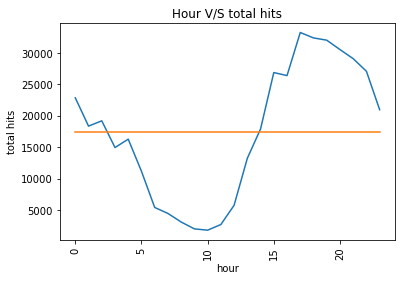

In [39]:
day_dict=dict(revenue_generated.groupby(['Hour']).sum()["totals.hits"])
plt.plot(list(day_dict.keys()),list(day_dict.values()))
plt.plot(list(day_dict.keys()),[np.mean(list(day_dict.values()))]*len(list(day_dict.keys())))
plt.title('Hour V/S total hits')
plt.ylabel('total hits')
plt.xlabel('hour')
# fig = plt.gcf()
# fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

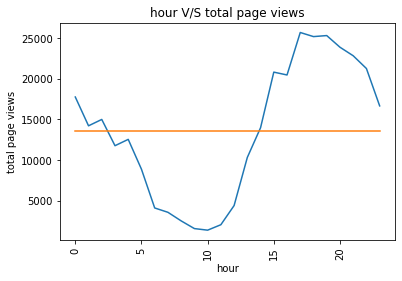

In [40]:
day_dict=dict(revenue_generated.groupby(['Hour']).sum()["totals.pageviews"])
plt.plot(list(day_dict.keys()),list(day_dict.values()))
plt.plot(list(day_dict.keys()),[np.mean(list(day_dict.values()))]*len(list(day_dict.keys())))
plt.title('hour V/S total page views')
plt.ylabel('total page views')
plt.xlabel('hour')
# fig = plt.gcf()
# fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()

- It is clearly visible from the figure below that the highest revenue generator is our  Desktop device category followed by mobile and least revenue generated is then shared by tablet.

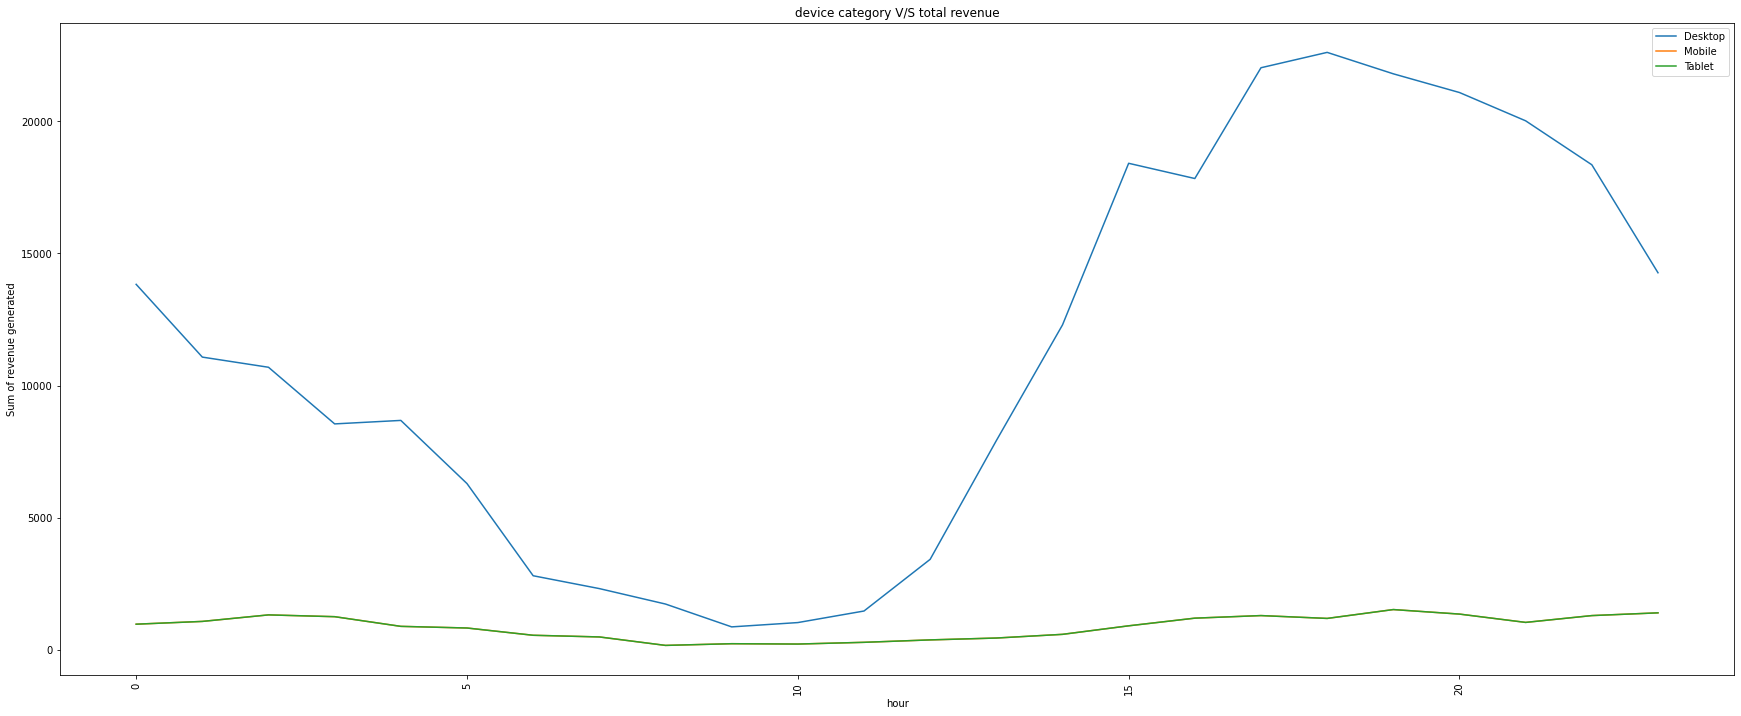

In [41]:
desktop_pv = dict(revenue_generated[revenue_generated["device.deviceCategory"]=="desktop"].groupby(['Hour']).sum()["totals.transactionRevenue"])
mobile_pv = dict(revenue_generated[revenue_generated["device.deviceCategory"]=="mobile"].groupby(['Hour']).sum()["totals.transactionRevenue"])
tablet_pv = dict(revenue_generated[revenue_generated["device.deviceCategory"]=="tablet"].groupby(['Hour']).sum()["totals.transactionRevenue"])
plt.plot(list(desktop_pv.keys()),list(desktop_pv.values()),Label="Desktop")
plt.plot(list(mobile_pv.keys()),list(mobile_pv.values()),Label="Mobile")
plt.plot(list(mobile_pv.keys()),list(mobile_pv.values()),Label="Tablet")
plt.title('device category V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('hour')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(30, 12)
plt.xticks(rotation=90)
plt.show()